# Redes de Bravais tridimensionales y sus volúmenes

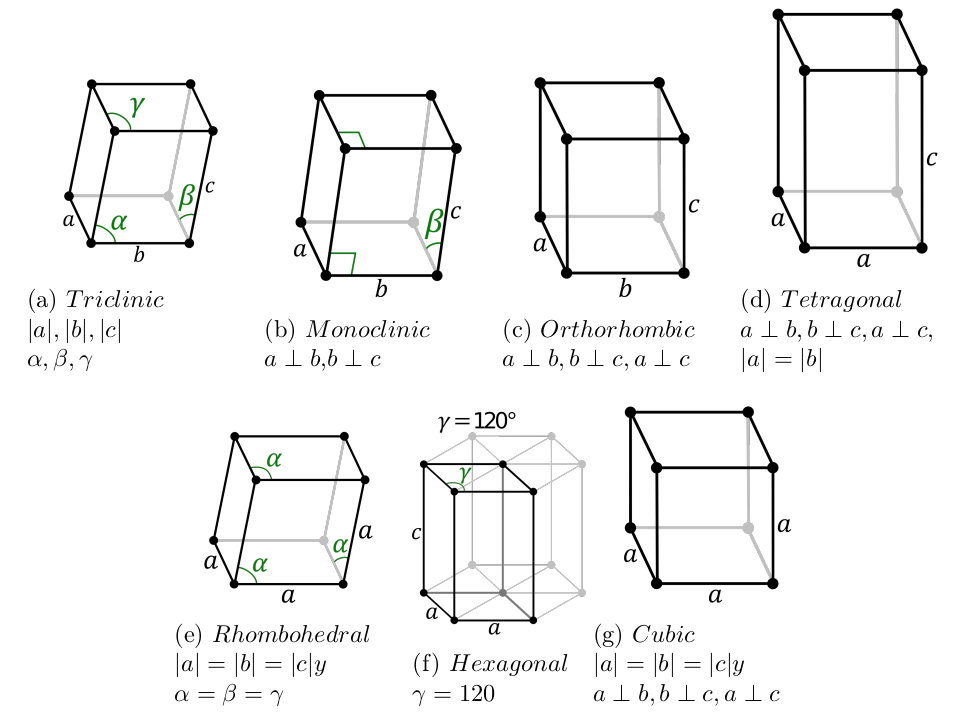

Iniciamos Sympy y las respectivas para hacer el computo simbolico durante la presentancion

In [33]:
import sympy as sp
from sympy import init_session, pretty_print, pi
init_session(use_latex = True)
from sympy.vector import CoordSys3D
a1, a2, a3, b1, b2, b3, c1, c2, c3 = sp.symbols('a_1 a_2 a_3 b_1 b_2 b_3 c_1 c_2 c_3')
i, j, k = sp.symbols('i j k')
a_mag, b_mag, c_mag = sp.symbols('a_mag b_mag c_mag', positive=True)  # Magnitudes
alpha, beta, gamma, theta= sp.symbols('alpha beta gamma theta')  # Ángulos
A = CoordSys3D('A')
A.i + A.j + A.k


IPython console for SymPy 1.11.1 (Python 3.11.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



## Triclinic 

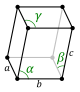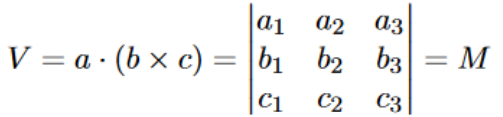

Se tiene que probar esta igualdad

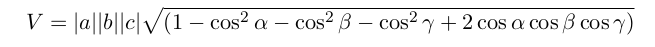

In [5]:
a = sp.Matrix([a1,a2,a3]).T
b = sp.Matrix([b1,b2,b3]).T
c = sp.Matrix([c1,c2,c3]).T
a,b,c

([a₁  a₂  a₃], [b₁  b₂  b₃], [c₁  c₂  c₃])

In [6]:
m = sp.Matrix([a, b, c]).T
m

⎡a₁  b₁  c₁⎤
⎢          ⎥
⎢a₂  b₂  c₂⎥
⎢          ⎥
⎣a₃  b₃  c₃⎦

In [7]:
(a,b,c) = symbols('a b c')
v_a_demostrar =  a * b * c * sqrt(1 - cos(alpha)**2 - cos(beta)**2 - cos(gamma)**2 + 2*cos(alpha)*cos(beta)*cos(gamma)) 
m, separatevars(v_a_demostrar)

⎛⎡a₁  b₁  c₁⎤           ______________________________________________________
⎜⎢          ⎥          ╱      2                                  2         2  
⎜⎢a₂  b₂  c₂⎥, a⋅b⋅c⋅╲╱  - cos (α) + 2⋅cos(α)⋅cos(β)⋅cos(γ) - cos (β) - cos (γ
⎜⎢          ⎥                                                                 
⎝⎣a₃  b₃  c₃⎦                                                                 

______⎞
      ⎟
) + 1 ⎟
      ⎟
      ⎠

In [8]:
#Producto triple
a = sp.Matrix([a1,a2,a3]).T
b = sp.Matrix([b1,b2,b3]).T
c = sp.Matrix([c1,c2,c3]).T
V_prod_triple = a.dot(b.cross(c))
V_prod_triple_cuadrado = expand(V_prod_triple ** 2)
expand(V_prod_triple)

In [9]:
#Determinante de los tres vectores
m.det()

In [12]:
#Se cumple entonces la igualdad 
m.det() == expand(V_prod_triple)

True

### Tenemos que empezar con la matriz de los vectores primitivos porque existe una propiedad muy util.

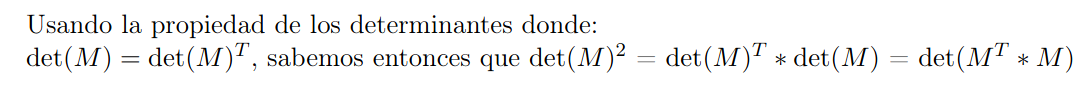

In [13]:
m_2 = m.T * m
det_m_cuadrado = m_2.det()
factor(det_m_cuadrado)


### Aca elevamos el det al cuadrado entonces miremos si se mantiene la igualdad

In [14]:
det_m_cuadrado == V_prod_triple_cuadrado

True

## Okey ahora trabajemos con el det cuadrado

In [15]:
m_2

⎡     2     2     2                                                 ⎤
⎢   a₁  + a₂  + a₃      a₁⋅b₁ + a₂⋅b₂ + a₃⋅b₃  a₁⋅c₁ + a₂⋅c₂ + a₃⋅c₃⎥
⎢                                                                   ⎥
⎢                            2     2     2                          ⎥
⎢a₁⋅b₁ + a₂⋅b₂ + a₃⋅b₃     b₁  + b₂  + b₃      b₁⋅c₁ + b₂⋅c₂ + b₃⋅c₃⎥
⎢                                                                   ⎥
⎢                                                   2     2     2   ⎥
⎣a₁⋅c₁ + a₂⋅c₂ + a₃⋅c₃  b₁⋅c₁ + b₂⋅c₂ + b₃⋅c₃     c₁  + c₂  + c₃    ⎦

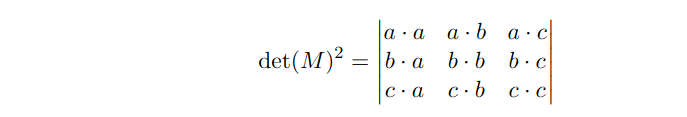


Pero tambien sabemos que el producto punto de varios vectores se puede representar de la siguiente forma

In [16]:
(a.norm() * b.norm()) * sp.cos(theta)

Entonces reemplazando

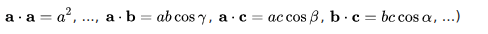

In [17]:
(a,b,c) = symbols('a b c')
m_2 = m * m.T                                               
m_2[0, 1] = b * a * sp.cos(beta)
m_2[0, 2] = c * a * sp.cos(gamma)
m_2[1, 0] = a * b * sp.cos(beta)
m_2[1, 2] = c * b * sp.cos(alpha)
m_2[2, 0] = a * c * sp.cos(gamma)
m_2[2, 1] = b * c * sp.cos(alpha)
m_2[0,0] = a**2
m_2[1,1] = b**2
m_2[2,2] = c**2
m_2

⎡     2                            ⎤
⎢    a       a⋅b⋅cos(β)  a⋅c⋅cos(γ)⎥
⎢                                  ⎥
⎢                 2                ⎥
⎢a⋅b⋅cos(β)      b       b⋅c⋅cos(α)⎥
⎢                                  ⎥
⎢                             2    ⎥
⎣a⋅c⋅cos(γ)  b⋅c⋅cos(α)      c     ⎦

In [18]:
det_m_2 = m_2.det()
det_m_2

desarrolando el determinante saldrian las siguientes expresiones


In [19]:
det = collect(det_m_2, a**2 * b**2 * c**2)
det

In [20]:
powdenest(sqrt(det), force=True)

In [21]:
separatevars(v_a_demostrar)

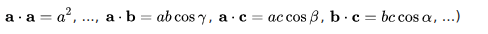

In [22]:
separatevars(v_a_demostrar) == powdenest(sqrt(det), force=True)

True

# Queda entonces demostrado y la usaremos como base para el resto de demostraciones

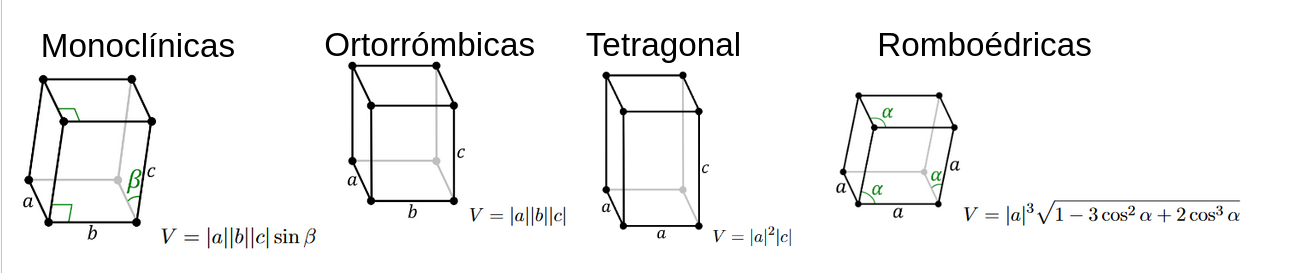

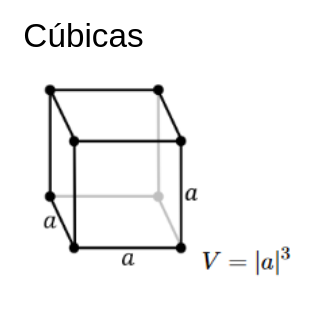

In [23]:
volumen_general = separatevars(v_a_demostrar)
#Monoclinicas
valores_Monoclinicas = {
    alpha: pi/2,
    gamma: pi/2
}
volumen_Monoclinicas = powdenest(trigsimp(volumen_general.subs(valores_Monoclinicas)), force=True)

#Ortorrombicas
valores_Ortorrombicas = {
    beta: pi/2,
    alpha: pi/2,
    gamma: pi/2
}
volumen_Ortorrombicas = volumen_general.subs(valores_Ortorrombicas)

#Tetragonal
valores_Tetragonal = {
    beta: pi/2,
    alpha: pi/2,
    gamma: pi/2,
    b: a
}
volumen_Tetragonal = volumen_general.subs(valores_Tetragonal)

#Romboedrica
valores_Romboedrica = {
    beta: alpha,
    alpha: alpha,
    gamma: alpha,
    b: a,
    c: a
}
volumen_Romboedrica = volumen_general.subs(valores_Romboedrica)

#Cubica
valores_Cubica = {
    beta: pi/2,
    alpha: pi/2,
    gamma: pi/2,
    b: a,
    c: a
}
volumen_Cubica = volumen_general.subs(valores_Cubica)



print('Volumen Monoclinicas:',volumen_Monoclinicas)
print('Volumen Ortorrombicas:',volumen_Ortorrombicas)
print('Volumen Tetragonal:',volumen_Tetragonal)
print('Volumen Romboedrica:', volumen_Romboedrica)
print('Volumen Cubica:', volumen_Cubica)

Volumen Monoclinicas: a*b*c*sin(beta)
Volumen Ortorrombicas: a*b*c
Volumen Tetragonal: a**2*c
Volumen Romboedrica: a**3*sqrt(2*cos(alpha)**3 - 3*cos(alpha)**2 + 1)
Volumen Cubica: a**3


### Para las Hexagonales usaremos otra definicion

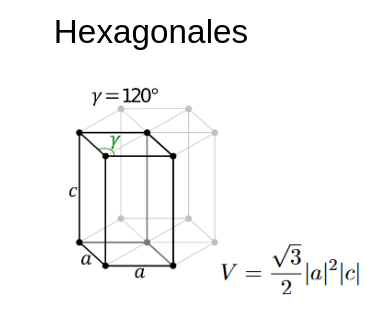

Como sabemos el volumen puede ser representado por el producto mixto entre vectores, sea entonces la definicion

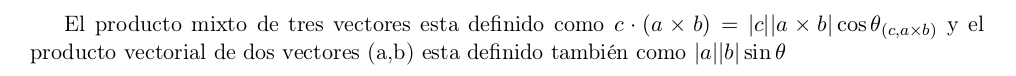

In [24]:
#Reemplazando la nueva definicion del producto vectorial tenemos que:

#Hexagonales
valores_Hexagonales = {
    gamma: 2*pi/3,
    b:a,
    c:c
}
volumen_Hexagonales = c * a * b * sin(gamma)
volumen_Hexagonales.subs(valores_Hexagonales)

# Sistemas cubicos, sistema cúbico cara centrada (fcc por sus siglas en inglés) y cúbico cuerpo centrado (bcc)

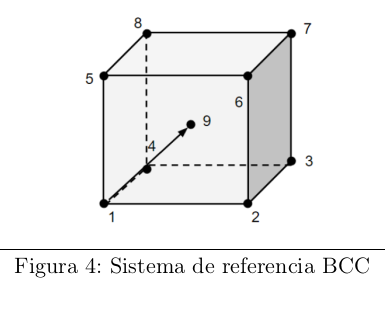 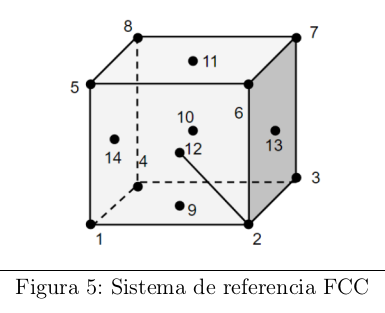

la idea es mostrar que el sistema BCC puede ser descrito por los siguientes vectores primtivos 

In [10]:
(a,b,c) = symbols('a b c')

c_a_ijk = (a * (i + j + k))/2
a_i = a * (i)
b_j = b * j

a_i, b_j, c_a_ijk

Primero comprobemos si son linealmente independientes, el det servira para esto y al mismo tiempo servira para hallar el volumen y en tal caso de tener geometria cubica sera evidente de que cumplen con esa condicion


In [11]:
substitutions = {i: 1, j: 1, k: 1}
bcc = Matrix([[a * i, 0 , 0],
              [0, a * j, 0],
              [a * (i)/2, a *(j)/2, a * (k)/2]])

bcc_expanded = bcc.subs(substitutions)
bcc, bcc_expanded.det()

⎛⎡a⋅i   0    0 ⎤    ⎞
⎜⎢             ⎥   3⎟
⎜⎢ 0   a⋅j   0 ⎥  a ⎟
⎜⎢             ⎥, ──⎟
⎜⎢a⋅i  a⋅j  a⋅k⎥  2 ⎟
⎜⎢───  ───  ───⎥    ⎟
⎝⎣ 2    2    2 ⎦    ⎠

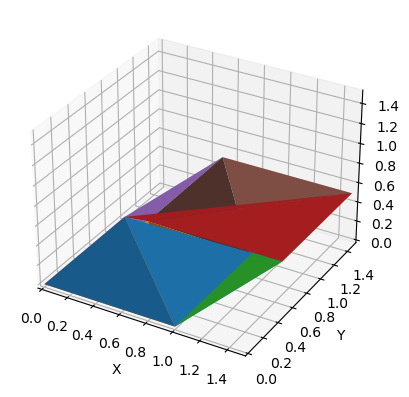

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los vectores base
a = np.array([1, 0, 0])  # aı̂
b = np.array([0, 1, 0])  # aȷ̂
c = np.array([0.5, 0.5, 0.5])  # a(ı̂ + ȷ̂ + k̂)/2

# Calcular los vértices del paralelepípedo
vertices = np.array([
    [0, 0, 0],
    a,
    b,
    c,
    a + b,
    a + c,
    b + c,
    a + b + c
])

# Definir las caras del paralelepípedo
caras = [
    [vertices[0], vertices[1], vertices[5], vertices[2]],
    [vertices[0], vertices[1], vertices[4], vertices[3]],
    [vertices[1], vertices[5], vertices[7], vertices[4]],
    [vertices[2], vertices[3], vertices[7], vertices[5]],
    [vertices[0], vertices[2], vertices[6], vertices[3]],
    [vertices[3], vertices[4], vertices[7], vertices[6]]
]

# Configurar la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar las caras
for cara in caras:
    x = np.array([vertex[0] for vertex in cara])
    y = np.array([vertex[1] for vertex in cara])
    z = np.array([vertex[2] for vertex in cara])
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

# Configurar los límites del eje
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 1.5])
ax.set_zlim([0, 1.5])

# Etiquetar los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar el gráfico
plt.show()


## BCC con otros vectores primitivos

mostrar que el sistema BCC puede ser descrito por los siguientes vectores primtivos:

In [12]:
(a,b,c) = symbols('a b c')


c_k= (a * ( j - k + i))/2
a_i = (a * ( j + k - i))/2
b_j = (a * ( -j + k + i))/2

expand(a_i), expand(b_j), expand(c_k)

Primero comprobemos si son linealmente independientes, el det servira para esto y al mismo tiempo servira para hallar el volumen y en tal caso de tener geometria cubica sera evidente de que cumplen con esa condicion


In [17]:
substitutions = {i: 1, j: 1, k: 1}
bcc = Matrix([[(a * (-i))/2, (a * (j))/2 , (a * (k))/2],
              [(a * (i))/2, (a * (-j))/2, (a * (k))/2],
              [(a * (i))/2, (a * (j))/2, (a * (-k))/2]])

bcc_expanded = bcc.subs(substitutions)
bcc, bcc_expanded.det()

⎛⎡-a⋅i    a⋅j    a⋅k ⎤    ⎞
⎜⎢─────   ───    ─── ⎥    ⎟
⎜⎢  2      2      2  ⎥    ⎟
⎜⎢                   ⎥   3⎟
⎜⎢ a⋅i   -a⋅j    a⋅k ⎥  a ⎟
⎜⎢ ───   ─────   ─── ⎥, ──⎟
⎜⎢  2      2      2  ⎥  2 ⎟
⎜⎢                   ⎥    ⎟
⎜⎢ a⋅i    a⋅j   -a⋅k ⎥    ⎟
⎜⎢ ───    ───   ─────⎥    ⎟
⎝⎣  2      2      2  ⎦    ⎠

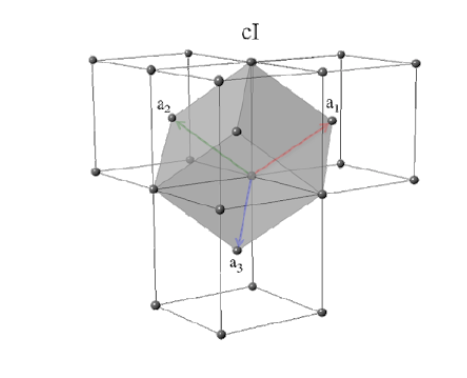

## FCC 

In [14]:
(a,b,c) = symbols('a b c')
c_k= (a * ( k + i))/2
a_i = (a * ( j + k ))/2
b_j = (a * ( k + i))/2

expand(a_i), expand(b_j), expand(c_k)

Primero comprobemos si son linealmente independientes, el det servira para esto y al mismo tiempo servira para hallar el volumen y en tal caso de tener geometria cubica sera evidente de que cumplen con esa condicion

In [15]:
substitutions = {i: 1, j: 1, k: 1}
bcc = Matrix([[0, (a * (j))/2 , (a * (k))/2],
              [(a * (i))/2, 0, (a * (k))/2],
              [(a * (i))/2, (a * (j))/2, 0]])

bcc_expanded = bcc.subs(substitutions)
bcc, bcc_expanded.det()

⎛⎡     a⋅j  a⋅k⎤    ⎞
⎜⎢ 0   ───  ───⎥    ⎟
⎜⎢      2    2 ⎥    ⎟
⎜⎢             ⎥   3⎟
⎜⎢a⋅i       a⋅k⎥  a ⎟
⎜⎢───   0   ───⎥, ──⎟
⎜⎢ 2         2 ⎥  4 ⎟
⎜⎢             ⎥    ⎟
⎜⎢a⋅i  a⋅j     ⎥    ⎟
⎜⎢───  ───   0 ⎥    ⎟
⎝⎣ 2    2      ⎦    ⎠

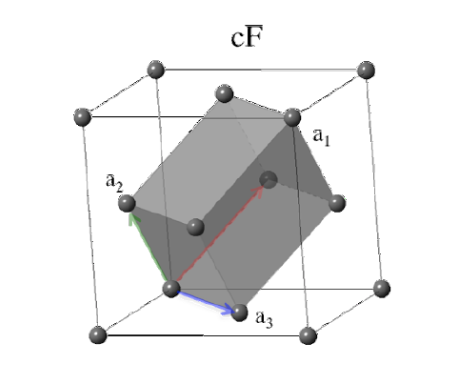

# REDES RECIPROCAS

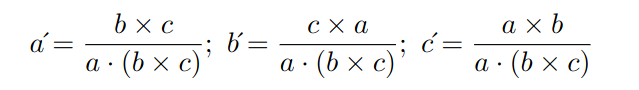

Exprese los vectores y las celdas recı́procas para los sistemas cúbico simple, y los distintos bcc y fcc. Calcule además el volumen de cada celda recı́proca.

## Cubico simple

In [85]:
#Iniciamos las expresiones
(a,b,c) = symbols('a b c')
a_prima, b_prima, c_prima = symbols("a' b' c'")

#Vectores cubicos
ai = a * A.i
bi = a * A.j
ci = a * A.k
print('Vectores cubicos')
print(ai, bi, ci)

a_prima = (bi.cross(ci))/(ai.dot(bi.cross(ci)))
b_prima = (ci.cross(ai))/(ai.dot(bi.cross(ci)))
c_prima = (ai.cross(bi))/(ai.dot(bi.cross(ci)))
a_prima , b_prima, c_prima

Vectores cubicos
a*A.i a*A.j a*A.k


In [87]:
print('Volumen')
volumen = a_prima.dot(b_prima.cross(c_prima))
volumen

Volumen


## Primer sistema bcc

In [88]:
#Vectores bcc
ai = a * A.i
bi = a * A.j
ci = a * ((A.i + A.j + A.k)/2)

print('Vectores bcc')
print(ai, bi, (ci))

a_prima = (bi.cross(ci))/(ai.dot(bi.cross(ci)))
b_prima = (ci.cross(ai))/(ai.dot(bi.cross(ci)))
c_prima = (ai.cross(bi))/(ai.dot(bi.cross(ci)))
a_prima , b_prima, c_prima

Vectores bcc
a*A.i a*A.j a/2*A.i + a/2*A.j + a/2*A.k


In [89]:
print('Volumen')
volumen = a_prima.dot(b_prima.cross(c_prima))
volumen

Volumen


## Segundo sistema fcc

In [90]:
#Vectores fcc
ai = a * (A.j + A.k)/2
bi = a * (A.i + A.k)/2
ci = a * (A.i + A.j)/2

print('Vectores fcc')
print(ai, bi, (ci))

a_prima = (bi.cross(ci))/(ai.dot(bi.cross(ci)))
b_prima = (ci.cross(ai))/(ai.dot(bi.cross(ci)))
c_prima = (ai.cross(bi))/(ai.dot(bi.cross(ci)))
a_prima , b_prima, c_prima

Vectores fcc
a/2*A.j + a/2*A.k a/2*A.i + a/2*A.k a/2*A.i + a/2*A.j


In [91]:
print('Volumen')
volumen = a_prima.dot(b_prima.cross(c_prima))
volumen

Volumen
